In [31]:
import pandas as pd
df = pd.read_csv('../../calibration-study/cifar10_tss.csv')
# Assuming `df` is your original DataFrame and 'ece' column contains list of dictionaries
# Create an empty DataFrame with desired columns
# Define the list of numbers as strings
bins = ['5', '10', '15', '20', '25', '50', '100', '200', '500']
bin_columns = ['5_bins','10_bins','15_bins','20_bins','25_bins','50_bins','100_bins', '200_bins', '500_bins']

# Generate the list of column names to keep
columns_to_keep = [f'pre_ECE_{bin}' for bin in bins]

# Filter the DataFrame based on these column names
plot_df = df[[col for col in df.columns if col in columns_to_keep]]

plot_df.columns = bin_columns


In [35]:
df[['pre_ECE_15','post_ECE_15']]

,pre_ECE_15,post_ECE_15
0,0.046592,0.007799
1,0.046332,0.012777
2,0.036951,0.019100
3,0.021655,0.012637
4,0.025379,0.015699
...,...,...
15620,0.018556,0.010476
15621,0.053727,0.014126
15622,0.050713,0.009454
15623,0.054121,0.017947


In [38]:
# Generate the list of column names to keep
columns_post = [f'post_ECE_{bin}' for bin in bins]

# Filter the DataFrame based on these column names
plotpost_df = df[[col for col in df.columns if col in columns_post]]

plotpost_df.columns = [f"{col} post" for col in bin_columns]

In [39]:
combined_df = pd.concat([plot_df, plotpost_df], axis=1)

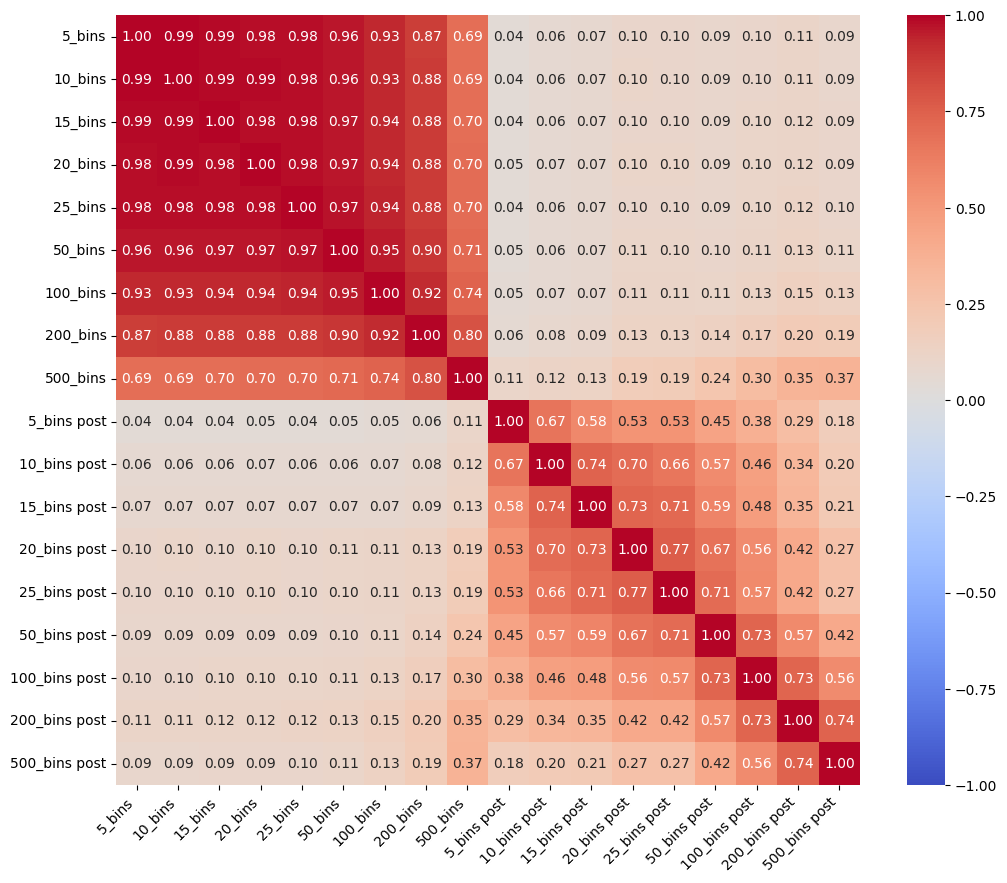

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kendalltau

# Calculate the Kendall ranking correlation matrix for the combined DataFrame
all_columns = bin_columns + [f"{col} post" for col in bin_columns]
corr_matrix = pd.DataFrame(index=all_columns, columns=all_columns)

def nansafe_kendalltau(a, b):
    mask = ~(np.isnan(a) | np.isnan(b))
    return kendalltau(a[mask], b[mask])


for col1 in all_columns:
    for col2 in all_columns:
        corr, _ = nansafe_kendalltau(combined_df[col1], combined_df[col2])
        corr_matrix.loc[col1, col2] = corr

# Create a correlation heatmap using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix.astype(float), annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")
# plt.title("ImageNet ECE Kendall Ranking Correlation Heatmap ")

# Rotate the bottom labels
plt.xticks(rotation=45, ha='right')

# plt.savefig("fig/Kendall_cifar10_temp.pdf", dpi=300, format='pdf', bbox_inches='tight')
plt.show()


In [ ]:
""